In [48]:
import pandas as pd
import os

In [49]:

file_path = r"C:\Users\User\airports.dat"
df1 = pd.read_csv(file_path, delimiter=',', header=None)  
print(df1.head())


   0                                            1             2   \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

                 3    4     5         6           7     8   9  10  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998  5282  10  U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001    20  10  U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005  5388  10  U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977   239  10  U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001   146  10  U   

                     11       12           13  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport

In [50]:
print(df1.columns)
print(df1[4])

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
0       GKA
1       MAG
2       HGU
3       LAE
4       POM
       ... 
7693     \N
7694     \N
7695     \N
7696    CPO
7697     \N
Name: 4, Length: 7698, dtype: object


In [51]:
file_path = r"C:\Users\User\routes.dat"
df2 = pd.read_csv(file_path, delimiter=',', header=None)  
print(df2.head())



    0    1    2     3    4     5    6  7    8
0  2B  410  AER  2965  KZN  2990  NaN  0  CR2
1  2B  410  ASF  2966  KZN  2990  NaN  0  CR2
2  2B  410  ASF  2966  MRV  2962  NaN  0  CR2
3  2B  410  CEK  2968  KZN  2990  NaN  0  CR2
4  2B  410  CEK  2968  OVB  4078  NaN  0  CR2


In [92]:
import networkx as nx
import matplotlib.pyplot as plt

# Estrai i nodi dal primo dataset (valori distinti di una determinata colonna)
nodi = df1[4].unique()

# Crea il grafo
G = nx.Graph()

# Aggiungi i nodi al grafo
G.add_nodes_from(nodi)

# Per ogni riga del secondo dataset, se una coppia di nodi appare nella stessa riga, crea un arco tra di loro
for _, row in df2.iterrows():
    # Estrai i valori della riga come una lista di nodi candidati
    candidati = row.values
    
    # Crea archi tra ogni coppia di nodi presenti contemporaneamente nella stessa riga
    for i in range(len(candidati)):
        for j in range(i + 1, len(candidati)):
            if candidati[i] in nodi and candidati[j] in nodi:
                if G.has_edge(candidati[i], candidati[j]):
                    current_weight = G[candidati[i]][candidati[j]]['weight']
                    G[candidati[i]][candidati[j]]['weight'] = current_weight + 1
                else:
                    G.add_edge(candidati[i], candidati[j], weight=1)

In [53]:
#alore non valido o mancante
G.remove_node('\\N')

In [54]:
G.number_of_nodes()

6072

In [55]:
G.number_of_edges() 

19730

In [9]:
nx.write_edgelist(G,'SNAerei.csv')

In [10]:
#grado medio dei nodi
sum(dict(G.degree()).values())/float(len(G))

6.498682476943347

In [11]:
import os
os.system('pip install powerlaw')

0

In [14]:
!pip install ndlib
!pip install networkx matplotlib bokeh

   ---------------------------------------- 0.0/110.2 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/110.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 110.2/110.2 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.0 MB 5.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/2.0 MB 7.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.1/2.0 MB 8.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.4/2.0 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 8.4 MB/s eta 0:00:00


In [13]:
import ndlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
nodi = df1[4].unique()

G = nx.Graph()
G.add_nodes_from(nodi)
for _, row in df2.iterrows():

    candidati = row.values
    
    for i in range(len(candidati)):
        for j in range(i + 1, len(candidati)):
            if candidati[i] in nodi and candidati[j] in nodi:
                if G.has_edge(candidati[i], candidati[j]):
                    current_weight = G[candidati[i]][candidati[j]]['weight']
                    G[candidati[i]][candidati[j]]['weight'] = current_weight + 1
                else:
                    G.add_edge(candidati[i], candidati[j], weight=1)

In [93]:
#alore non valido o mancante
G.remove_node('\\N')

In [109]:
#con attributi semantici
G = nx.Graph()

for _, row in df1.iterrows():
    G.add_node(row[0], name=row[1], city=row[2], country=row[3], 
               latitude=row[5], longitude=row[6], altitude=row[7], 
               timezone=row[8], dst=row[9], detailed_timezone=row[11], 
               type=row[12], source=row[13])

for _, row in df2.iterrows():
    G.add_edge(row[2], row[4], airline=row[0], route_id=row[1], num_stops=row[7], aircraft_model=row[8])


In [110]:
def SI_infection_with_semantics(graph, p, initial_infected_nodes, max_iterations=20):
    infected_nodes = initial_infected_nodes.copy()
    infection_over_time = [len(infected_nodes) / len(graph.nodes)]
    
    for _ in range(max_iterations):
        new_infected_nodes = set(infected_nodes)
        for node in graph.nodes:
            if node not in infected_nodes:
                #  cslc pob di infezione si attr del nodo e arco
                neighbors_infected = sum(1 for neighbor in graph.neighbors(node) if neighbor in infected_nodes)
                infection_prob = p
                
                # poss modificar la probabilità di infezione in base al tipo di aeroporto
                if 'type' in graph.nodes[node] and graph.nodes[node]['type'] == 'airport':
                    infection_prob *= 1.2  #perchè  è import!
                
        
                for neighbor in graph.neighbors(node):
                    if 'num_stops' in graph[node][neighbor] and graph[node][neighbor]['num_stops'] > 0:
                        infection_prob *= 1.1 
                
                infection_prob = 1 - (1 - infection_prob)**neighbors_infected
                
                if random.random() < infection_prob:
                    new_infected_nodes.add(node)
        infected_nodes = new_infected_nodes
        infection_over_time.append(len(infected_nodes) / len(graph.nodes))
    
    return infection_over_time


In [113]:
initial_infected_nodes = random.sample(list(G.nodes()), k=int(0.1 * len(G)))
print(f"Nodi inizialmente infetti: {initial_infected_nodes}")


Nodi inizialmente infetti: [3426, 12050, 3636, 907, 3795, 107, 10794, 623, 1159, 11993, 1420, 3686, 7918, 11897, 1112, 'MLG', 7861, 'ULN', 'KCO', 11793, 634, 'CIJ', 2646, 11965, 6422, 7209, 'VTE', 727, 8825, 7383, 'SMK', 3296, 7908, 'FCA', 7000, 4101, 5684, 'PAS', 'NLT', 2458, 'EXT', 'TRS', 'TAH', 'DFW', 5553, 11407, 1025, 'CEN', 'KHD', 'MRS', 7712, 452, 6220, 'SHA', 1392, 4367, 3040, 1855, 1416, 'HFE', 'MEH', 'ILP', 7875, 540, 955, 12310, 6493, 7563, 1830, 'HOD', 'HBX', 13609, 'AUG', 257, 938, 7571, 'VIE', 'UET', 'CHG', 'DDG', 1517, 12058, 8300, 898, 'TGG', 5931, 3750, 9413, 'TKU', 7521, 3802, 1577, 963, 8807, 8344, 'MKQ', 'KWI', 'CEB', 6951, 3789, 'QFG', 4325, 222, 'KRF', 2879, 8745, 12945, 1168, 989, 13193, 102, 'HPB', 'DAU', 278, 'WVB', 465, 'WXN', 'ATM', 'DHI', 'HOR', 2098, 'IVC', 7111, 9253, 8054, 775, 'PNQ', 5934, 3368, 2457, 'VKG', 'URE', 437, 8684, 4066, 'MVY', 3207, 'LIT', 6732, 'FWA', 'YQC', 3948, 6001, 455, 'SNP', 156, 4021, 418, 'FON', 'JZH', 'MQN', 2076, 'YYH', 592, 4197,

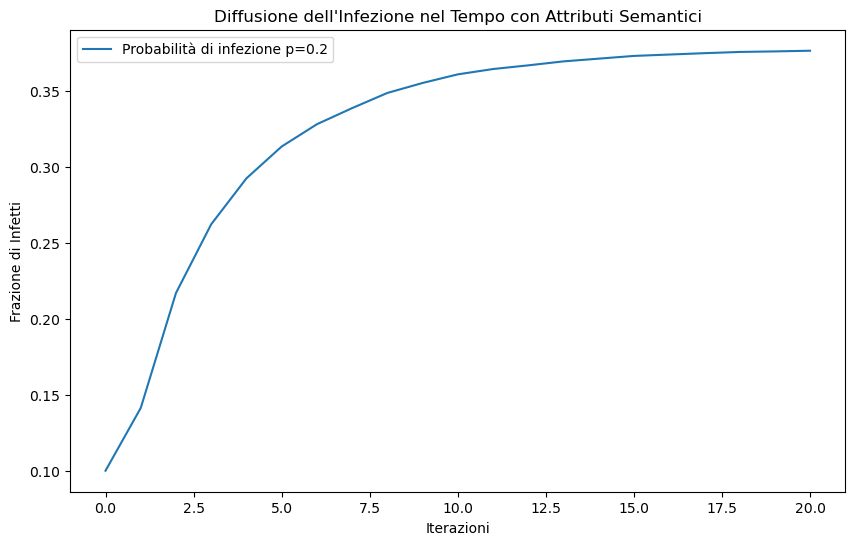

In [114]:
probability = 0.2  
infection_over_time = SI_infection_with_semantics(G, probability, initial_infected_nodes)


plt.figure(figsize=(10, 6))
plt.plot(infection_over_time, label=f'Probabilità di infezione p={probability}')
plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Diffusione dell\'Infezione nel Tempo con Attributi Semantici')
plt.legend()
plt.show()


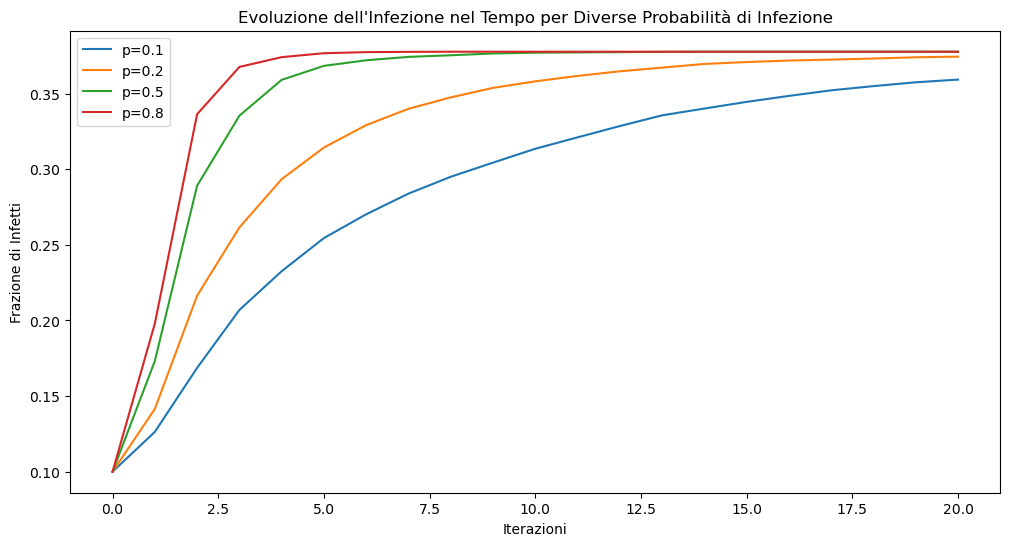

In [117]:
probabilities = [0.1, 0.2, 0.5, 0.8]

plt.figure(figsize=(12, 6))
for p in probabilities:
    infection_over_time = SI_infection_with_semantics(G, p, initial_infected_nodes)
    plt.plot(infection_over_time, label=f'p={p}')

plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Evoluzione dell\'Infezione nel Tempo per Diverse Probabilità di Infezione')
plt.legend()
plt.show()


In [ ]:
#vediamo i diversi tipi di grafi per sceglier epoi la combinazione piu adatta

In [30]:
# small word grap

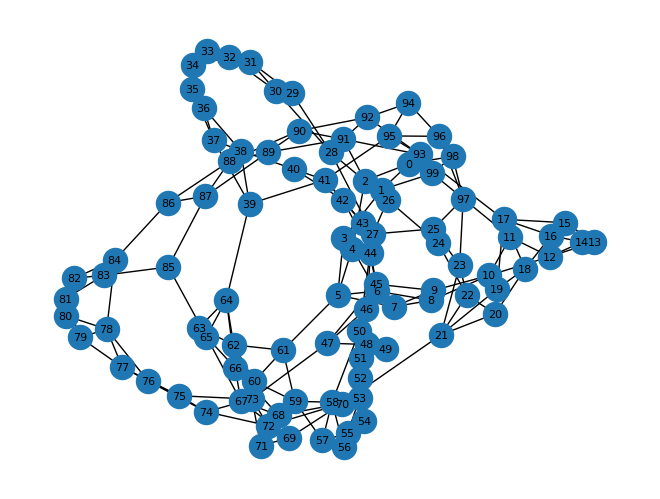

In [31]:
import networkx as nx
import random
import matplotlib.pyplot as plt


n = 100  
k = 4   
p = 0.1 

G_small_world = nx.watts_strogatz_graph(n, k, p)
nx.draw(G_small_world, with_labels=True, node_size=300, font_size=8)
plt.show()


In [32]:
#grid grap

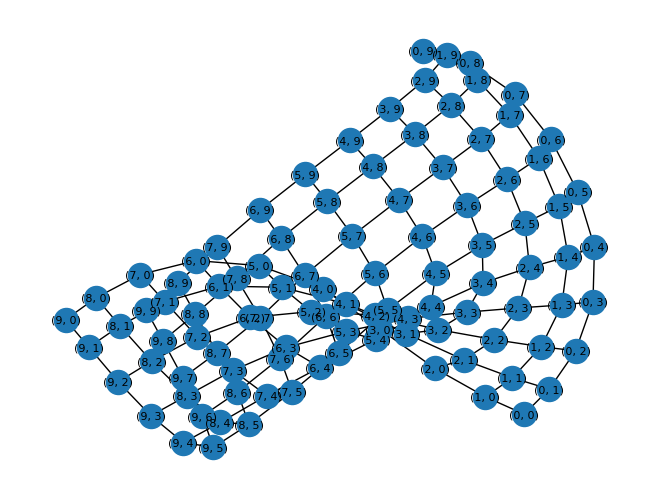

In [33]:
m, n = 10, 10  

G_lattice = nx.grid_2d_graph(m, n)
nx.draw(G_lattice, with_labels=True, node_size=300, font_size=8)
plt.show()


In [34]:
#complete grap

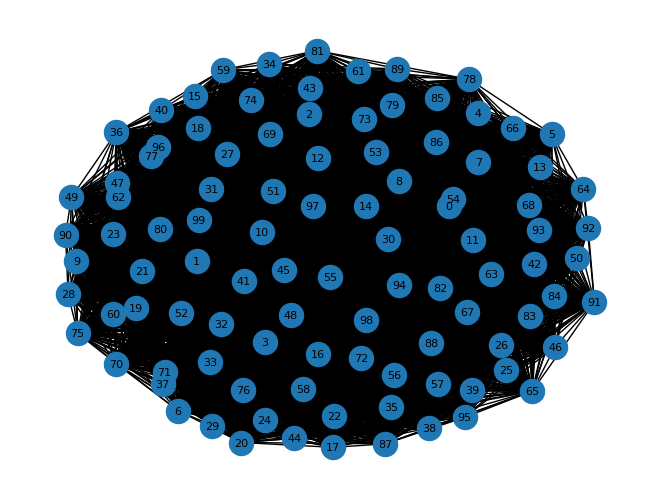

In [35]:
n = 100  

G_complete = nx.complete_graph(n)
nx.draw(G_complete, with_labels=True, node_size=300, font_size=8)
plt.show()


In [36]:
# random grap

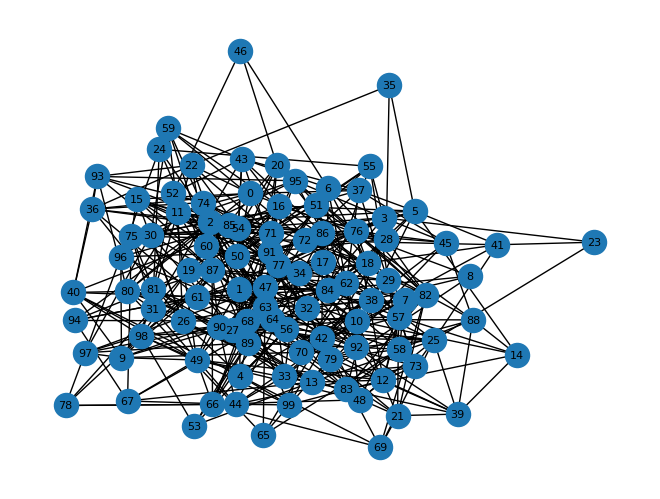

In [37]:
n = 100  
p = 0.1  

G_random = nx.erdos_renyi_graph(n, p)
nx.draw(G_random, with_labels=True, node_size=300, font_size=8)
plt.show()


In [38]:
#tree grap

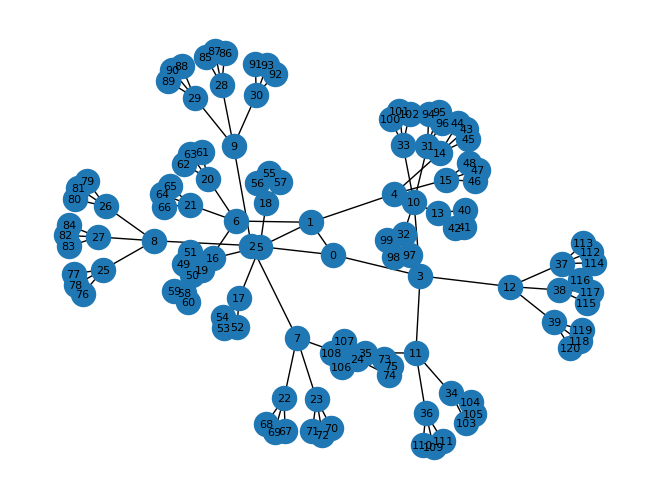

In [39]:
r = 3  
h = 4  
G_tree = nx.balanced_tree(r, h)
nx.draw(G_tree, with_labels=True, node_size=300, font_size=8)
plt.show()


In [40]:
#confronto

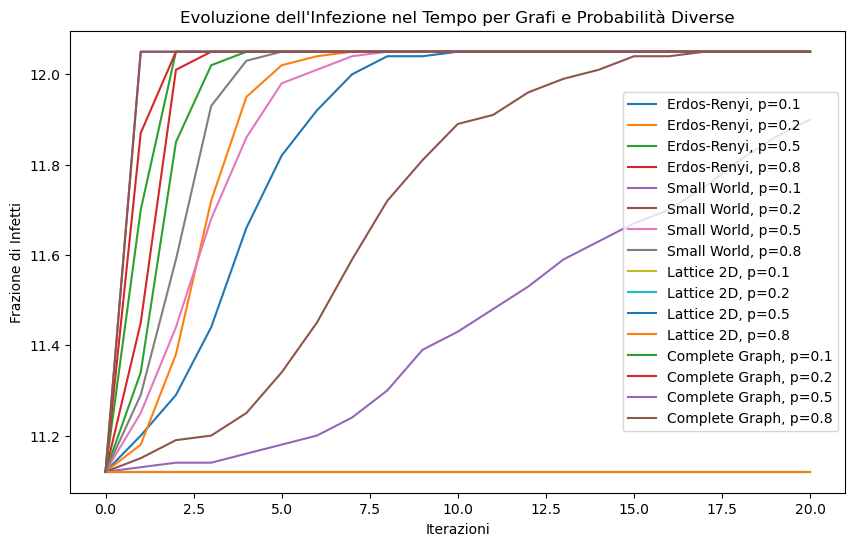

In [118]:
def run_simulation_on_different_graphs(graphs, probabilities, initial_infected_nodes):
    plt.figure(figsize=(10, 6))
    
    for G, label in graphs:
        for p in probabilities:
            infection_over_time = SI_infection_with_semantics(G, p, initial_infected_nodes)
            plt.plot(infection_over_time, label=f'{label}, p={p}')
    
    plt.xlabel('Iterazioni')
    plt.ylabel('Frazione di Infetti')
    plt.title('Evoluzione dell\'Infezione nel Tempo per Grafi e Probabilità Diverse')
    plt.legend()
    plt.show()

# le prob
probabilities = [0.1, 0.2, 0.5, 0.8]

graphs = [
    (nx.erdos_renyi_graph(100, 0.1), 'Erdos-Renyi'),
    (nx.watts_strogatz_graph(100, 4, 0.1), 'Small World'),
    (nx.grid_2d_graph(10, 10), 'Lattice 2D'),
    (nx.complete_graph(100), 'Complete Graph')
]

run_simulation_on_different_graphs(graphs, probabilities, initial_infected_nodes)


In [46]:
#Diffusione rapida e completa

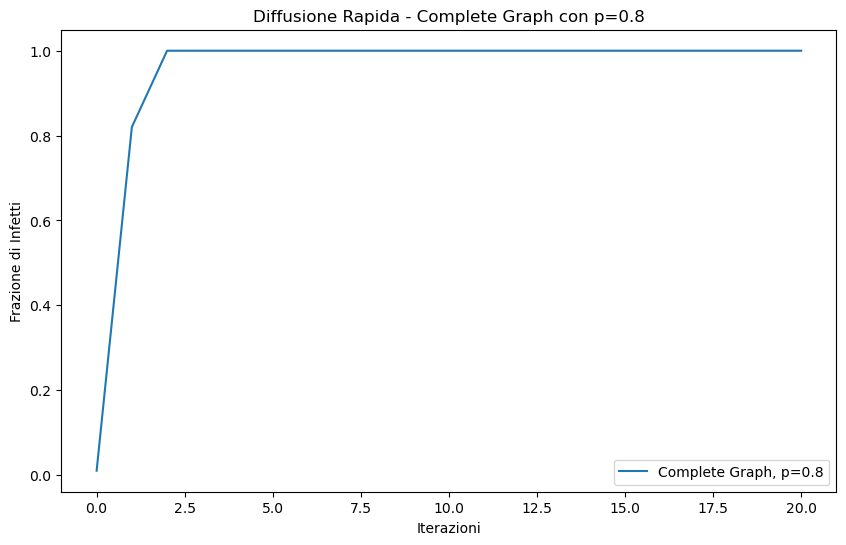

In [119]:
import networkx as nx
import matplotlib.pyplot as plt
def SI_infection(graph, p, initial_infected_nodes, max_iterations=20):
    infected_nodes = initial_infected_nodes.copy()
    infection_over_time = [len(infected_nodes) / len(graph.nodes)]
    
    for _ in range(max_iterations):
        new_infected_nodes = set(infected_nodes)  
        for node in graph.nodes:
            if node not in infected_nodes:
          
                neighbors_infected = sum(1 for neighbor in graph.neighbors(node) if neighbor in infected_nodes)
                infection_prob = 1 - (1 - p)**neighbors_infected
                if random.random() < infection_prob:
                    new_infected_nodes.add(node)
        infected_nodes = new_infected_nodes
        infection_over_time.append(len(infected_nodes) / len(graph.nodes))
    
    return infection_over_time

probability = 0.8

graph_complete = nx.complete_graph(100)

initial_infected_nodes = {0}

infection_over_time_complete = SI_infection_with_semantics(graph_complete, probability, initial_infected_nodes)

plt.figure(figsize=(10, 6))
plt.plot(infection_over_time_complete, label=f'Complete Graph, p={probability}')
plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Diffusione Rapida - Complete Graph con p=0.8')
plt.legend()
plt.show()


In [48]:
#Diffusione graduale e progressiva

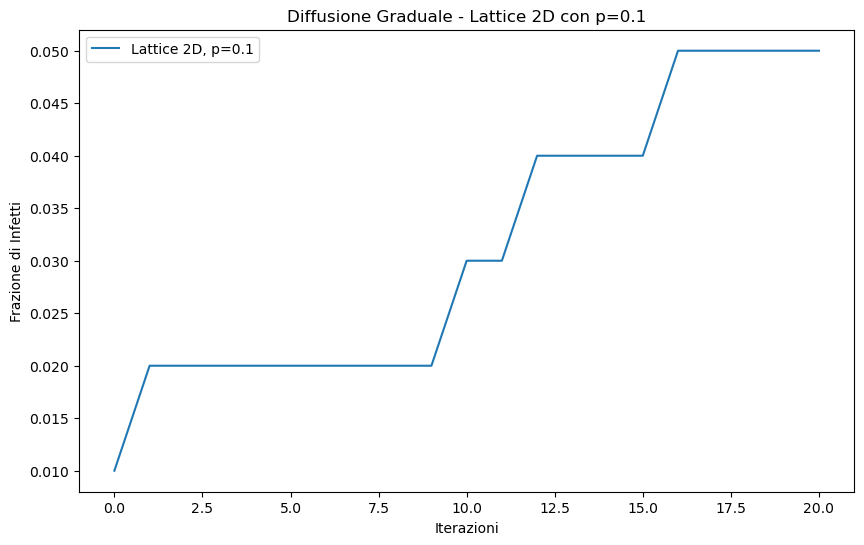

In [120]:
import networkx as nx
import matplotlib.pyplot as plt
import random
def SI_infection(graph, p, initial_infected_nodes, max_iterations=20):
    infected_nodes = initial_infected_nodes.copy()
    infection_over_time = [len(infected_nodes) / len(graph.nodes)]
    
    for _ in range(max_iterations):
        new_infected_nodes = set(infected_nodes)  
        for node in graph.nodes:
            if node not in infected_nodes:
                
                neighbors_infected = sum(1 for neighbor in graph.neighbors(node) if neighbor in infected_nodes)
                infection_prob = 1 - (1 - p)**neighbors_infected
                if random.random() < infection_prob:
                    new_infected_nodes.add(node)
        infected_nodes = new_infected_nodes
        infection_over_time.append(len(infected_nodes) / len(graph.nodes))
    
    return infection_over_time

probability = 0.1

graph_lattice = nx.grid_2d_graph(10, 10) 

initial_infected_nodes = {(0, 0)}

infection_over_time_lattice = SI_infection_with_semantics(graph_lattice, probability, initial_infected_nodes)

plt.figure(figsize=(10, 6))
plt.plot(infection_over_time_lattice, label=f'Lattice 2D, p={probability}')
plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Diffusione Graduale - Lattice 2D con p=0.1')
plt.legend()
plt.show()


In [50]:
# Comportamento intermedio

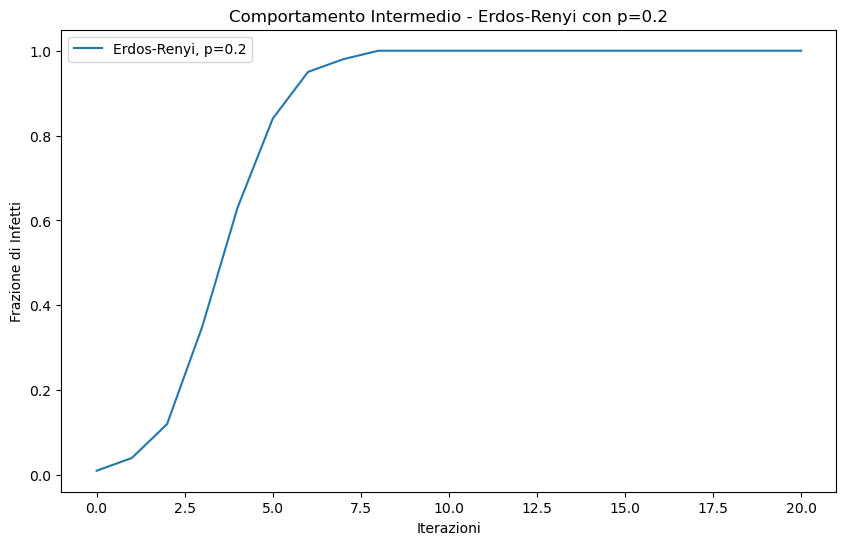

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def SI_infection(graph, p, initial_infected_nodes, max_iterations=20):
    infected_nodes = initial_infected_nodes.copy()
    infection_over_time = [len(infected_nodes) / len(graph.nodes)]
    
    for _ in range(max_iterations):
        new_infected_nodes = set(infected_nodes)  
        for node in graph.nodes:
            if node not in infected_nodes:
            
                neighbors_infected = sum(1 for neighbor in graph.neighbors(node) if neighbor in infected_nodes)
                infection_prob = 1 - (1 - p)**neighbors_infected
                if random.random() < infection_prob:
                    new_infected_nodes.add(node)
        infected_nodes = new_infected_nodes
        infection_over_time.append(len(infected_nodes) / len(graph.nodes))
    
    return infection_over_time
#p media
probability = 0.2


graph_erdos_renyi = nx.erdos_renyi_graph(100, 0.1)

initial_infected_nodes = {0}

infection_over_time_erdos_renyi = SI_infection_with_semantics(graph_erdos_renyi, probability, initial_infected_nodes)

plt.figure(figsize=(10, 6))
plt.plot(infection_over_time_erdos_renyi, label=f'Erdos-Renyi, p={probability}')
plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Comportamento Intermedio - Erdos-Renyi con p=0.2')
plt.legend()
plt.show()


In [122]:
#AVANZATA

In [133]:
G = nx.Graph()

for _, row in df1.iterrows():
    G.add_node(row[0], name=row[1], city=row[2], country=row[3], 
               latitude=row[5], longitude=row[6], altitude=row[7], 
               timezone=row[8], dst=row[9], detailed_timezone=row[11], 
               type=row[12], source=row[13])

for _, row in df2.iterrows():
    G.add_edge(row[2], row[4], airline=row[0], route_id=row[1], num_stops=row[7], aircraft_model=row[8])

In [134]:
def SIR_infection_with_semantics(graph, p, recovery_rate, initial_infected_nodes, max_iterations=20):
    status = {node: 'S' for node in graph.nodes}
    for node in initial_infected_nodes:
        status[node] = 'I'
    
    infection_over_time = [list(status.values()).count('I') / len(graph.nodes)]
    
    for _ in range(max_iterations):
        new_status = status.copy()
        
        for node in graph.nodes:
            if status[node] == 'I':
                for neighbor in graph.neighbors(node):
                    if status[neighbor] == 'S':
                        infection_prob = p
                        
                       
                        if 'type' in graph.nodes[neighbor] and graph.nodes[neighbor]['type'] == 'airport':
                            infection_prob *= 1.2 
                        
                        if random.random() < infection_prob:
                            new_status[neighbor] = 'I'
                
               
                if random.random() < recovery_rate:
                    new_status[node] = 'R'
        
        status = new_status
        infection_over_time.append(list(status.values()).count('I') / len(graph.nodes))
    
    return infection_over_time


In [135]:
initial_infected_nodes = random.sample(list(G.nodes()), k=int(0.1 * len(G))) 
print(f"Nodi inizialmente infetti: {initial_infected_nodes}")


Nodi inizialmente infetti: ['ODY', 3929, 11718, 8846, 'YWL', 6353, 668, 1580, 39, 3574, 6713, 'BZL', 3907, 3566, 13481, 202, 9388, 11822, 305, 3984, 3106, 'DHI', 1990, 424, 3448, 'SEA', 11798, 1196, 2878, 2999, 337, 13500, 'YNS', 1342, 1427, 13448, 8954, 'IWK', 7143, 7589, 'PGF', 'NST', 5928, 'PUS', 11803, 7981, 3476, 6304, 313, 1430, 'VQS', 2438, 'SCQ', 478, 2451, 2820, 9071, 7653, 3532, 1416, 'KBC', 'LIL', 9390, 1741, 2850, 'LRD', 4304, 11955, 'BDS', 'TJQ', 1848, 7122, 2667, 'IBR', 'CKH', 312, 7226, 'OLP', 395, 7142, 5789, 3901, 'HNS', 1008, 13718, 7822, 539, 25, 'GBT', 3234, 1551, 191, 206, 5797, 'CAB', 494, 2299, 4166, 904, 'ZYL', 4067, 1015, 'IKA', 'FUK', 2062, 3882, 2195, 2444, 4027, 11649, 13366, 'MZR', 'AAX', 'KFP', 168, 1859, 1235, 'LWY', 'KGX', 'TEB', 'BRM', 6744, 1530, 'WYA', 9943, 11021, 12919, 11053, 'YFB', 8520, 12049, 'FSM', 11243, 3764, 'UUD', 'OZH', 'UPG', 13365, 5910, 'MKE', 1860, 'MXV', 20, 8690, 5665, 5534, 7205, 13470, 5491, 'ACZ', 1174, 1895, 'SLL', 11784, 6157, 1

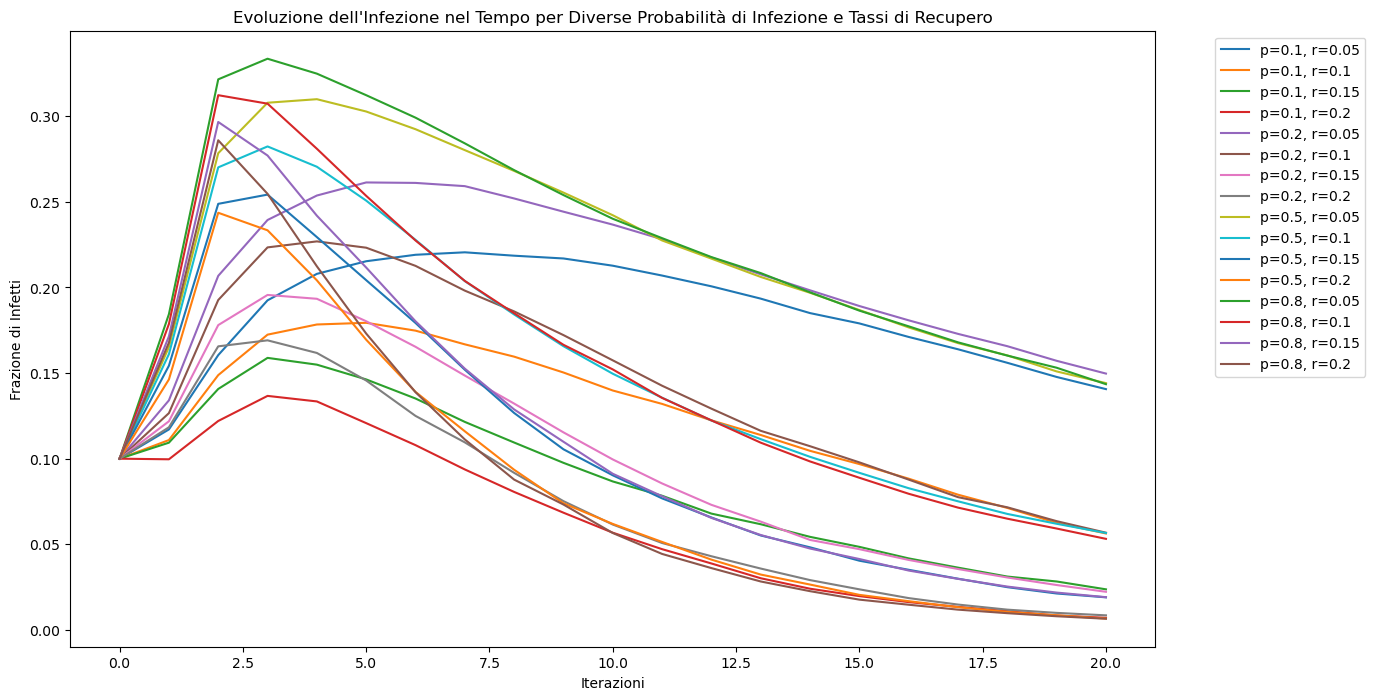

In [139]:

probabilities = [0.1, 0.2, 0.5, 0.8]
recovery_rates = [0.05, 0.1, 0.15, 0.2]

plt.figure(figsize=(14, 8))


for p in probabilities:
    for recovery_rate in recovery_rates:
        infection_over_time = SIR_infection_with_semantics(G, p, recovery_rate, initial_infected_nodes)
        plt.plot(infection_over_time, label=f'p={p}, r={recovery_rate}')

plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Evoluzione dell\'Infezione nel Tempo per Diverse Probabilità di Infezione e Tassi di Recupero')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


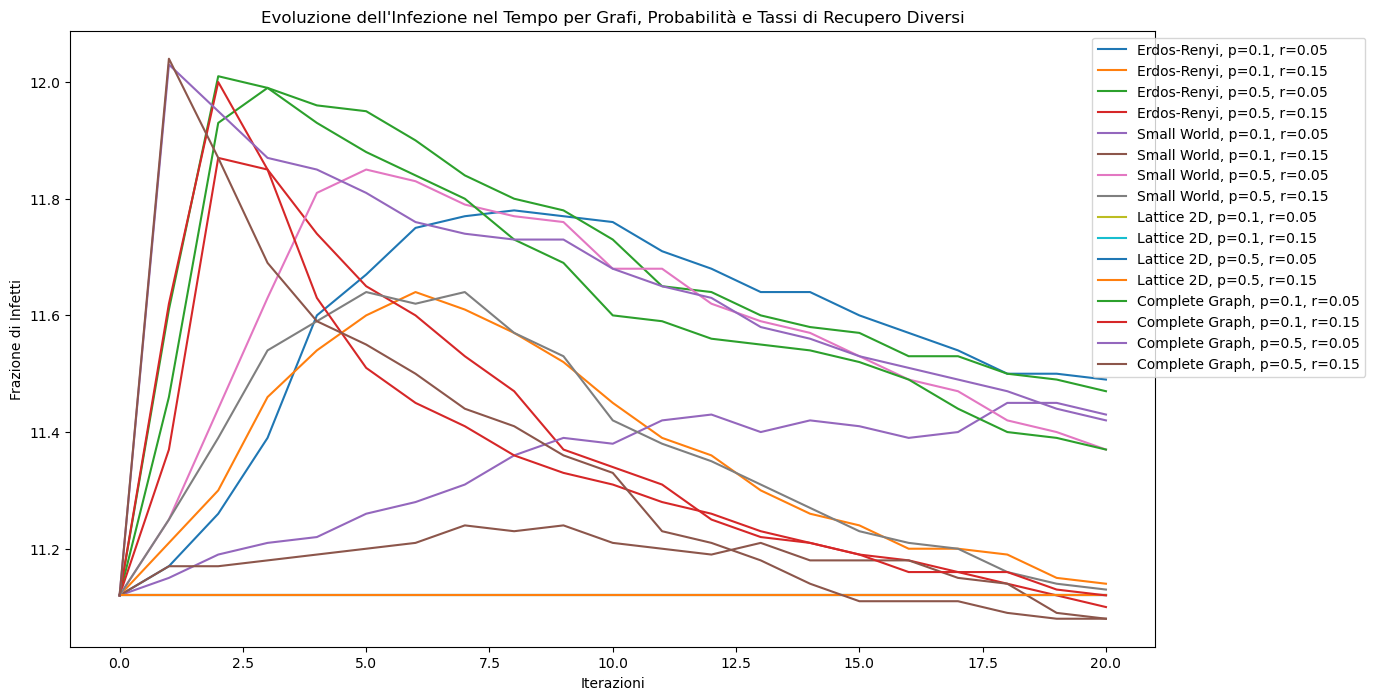

In [143]:

def run_simulation_on_different_graphs_SIR(graphs, probabilities, recovery_rates, initial_infected_nodes):
    
    plt.figure(figsize=(14, 8))
    
    for G, label in graphs:
        for p in probabilities:
            for recovery_rate in recovery_rates:
                infection_over_time = SIR_infection_with_semantics(G, p, recovery_rate, initial_infected_nodes)
                plt.plot(infection_over_time, label=f'{label}, p={p}, r={recovery_rate}')
    
    plt.xlabel('Iterazioni')
    plt.ylabel('Frazione di Infetti')
    plt.title('Evoluzione dell\'Infezione nel Tempo per Grafi, Probabilità e Tassi di Recupero Diversi')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

probabilities = [0.1,  0.5]
recovery_rates = [0.05,  0.15]


graphs = [
    (nx.erdos_renyi_graph(100, 0.1), 'Erdos-Renyi'),
    (nx.watts_strogatz_graph(100, 4, 0.1), 'Small World'),
    (nx.grid_2d_graph(10, 10), 'Lattice 2D'),
    (nx.complete_graph(100), 'Complete Graph')
]

run_simulation_on_different_graphs_SIR(graphs, probabilities, recovery_rates, initial_infected_nodes)


In [144]:
#SIS

In [146]:

G = nx.Graph()


for _, row in df1.iterrows():
    G.add_node(row[0], name=row[1], city=row[2], country=row[3], 
               latitude=row[5], longitude=row[6], altitude=row[7], 
               timezone=row[8], dst=row[9], detailed_timezone=row[11], 
               type=row[12], source=row[13])


for _, row in df2.iterrows():
    G.add_edge(row[2], row[4], airline=row[0], route_id=row[1], num_stops=row[7], aircraft_model=row[8])

In [147]:
def SIS_infection_with_semantics(graph, p, recovery_rate, initial_infected_nodes, max_iterations=20):
    status = {node: 'S' for node in graph.nodes}
    for node in initial_infected_nodes:
        status[node] = 'I'
    
    infection_over_time = [list(status.values()).count('I') / len(graph.nodes)]
    
    for _ in range(max_iterations):
        new_status = status.copy()
        
        for node in graph.nodes:
            if status[node] == 'I':
            
                for neighbor in graph.neighbors(node):
                    if status[neighbor] == 'S':
                        infection_prob = p
                        
                        
                        if 'type' in graph.nodes[neighbor] and graph.nodes[neighbor]['type'] == 'airport':
                            infection_prob *= 1.2  # Aumenta per aeroporti importanti
                        
                        if random.random() < infection_prob:
                            new_status[neighbor] = 'I'
                
               
                if random.random() < recovery_rate:
                    new_status[node] = 'S'
        
        status = new_status
        infection_over_time.append(list(status.values()).count('I') / len(graph.nodes))
    
    return infection_over_time


In [148]:
initial_infected_nodes = random.sample(list(G.nodes()), k=int(0.1 * len(G))) 
print(f"Nodi inizialmente infetti: {initial_infected_nodes}")


Nodi inizialmente infetti: [4180, 7591, 1623, 'PVU', 101, 'YFS', 'ASM', 3432, 2761, 4010, 463, 3526, 'LQM', 'BHK', 'AGB', 'VER', 2960, 9783, 'BDA', 126, 3742, 9308, 2334, 'BNE', 6060, 214, 5446, 825, 'PDS', 3112, 7505, 'PPK', 12004, 195, 14096, 6398, 'LPS', 1588, 3611, 1788, 2665, 6036, 4372, 'YQD', 3876, 11946, 8918, 7129, 5420, 3345, 1291, 7455, 'KAL', 6091, 6062, 1088, 'ORF', 'DNK', 2737, 'PDA', 10792, 13458, 'ZQZ', 5657, 1133, 6447, 5629, 6786, 9093, 10776, 3278, 'ZAH', 2404, 'NTE', 3911, 615, 13355, 3499, 3151, 2473, 274, 13681, 3736, 1269, 2994, 11875, 3078, 99, 'QBC', 'MQP', 7880, 5530, 3088, 1143, 'DOU', 'YZF', 1842, 3119, 1402, 'RAH', 7207, 11205, 5763, 3897, 706, 11994, 2070, 11839, 2142, 6034, 3296, 4040, 2134, 'THL', 8082, 'TAB', 1822, 629, 7307, 7560, 1855, 6747, 'RZR', 'ERL', 'WUA', 6038, 8949, 'POG', 6278, 'UTT', 'ATT', 3324, 3936, 'YAY', 359, 5710, 3906, 'AKU', 'MCM', 2748, 8555, 13525, 2121, 13491, 'SCW', 429, 7810, 3508, 'TOS', 1619, 'GEL', 'CGO', 'BJA', 'DNR', 1761, 

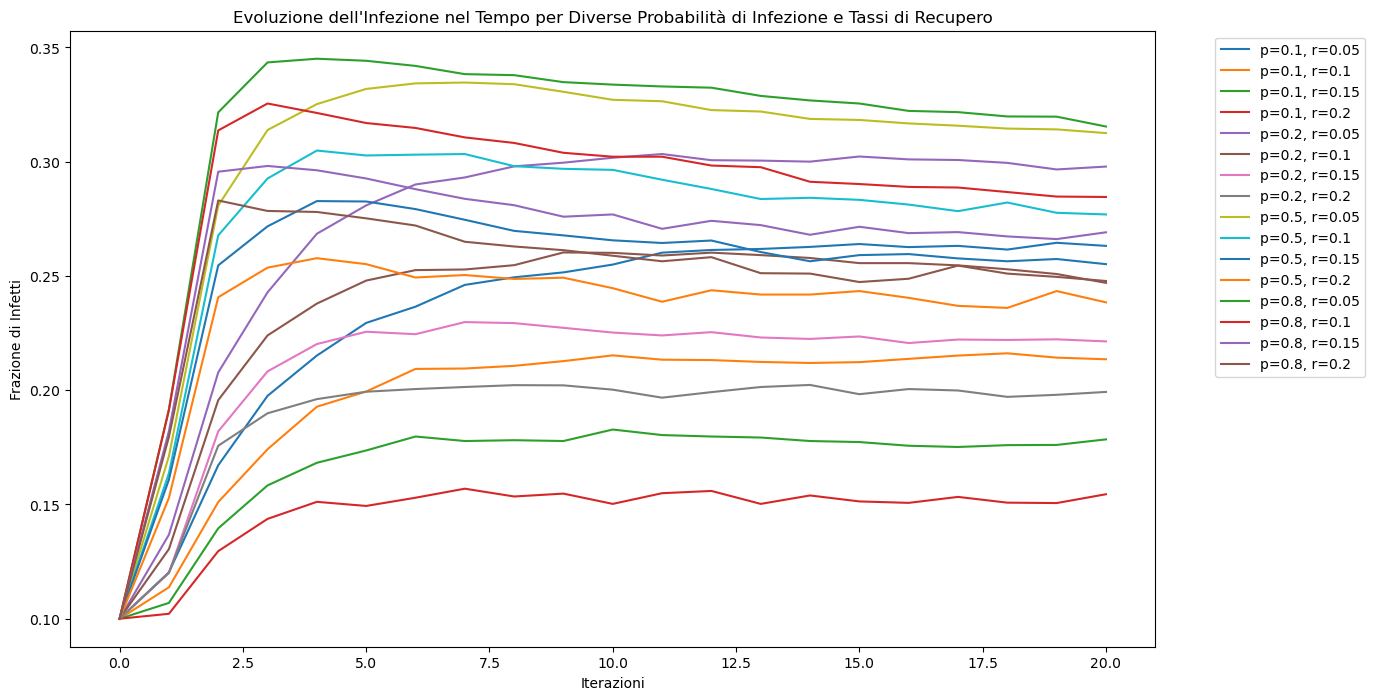

In [150]:

probabilities = [0.1, 0.2, 0.5, 0.8]
recovery_rates = [0.05, 0.1, 0.15, 0.2]

plt.figure(figsize=(14, 8))


for p in probabilities:
    for recovery_rate in recovery_rates:
        infection_over_time = SIS_infection_with_semantics(G, p, recovery_rate, initial_infected_nodes)
        plt.plot(infection_over_time, label=f'p={p}, r={recovery_rate}')

plt.xlabel('Iterazioni')
plt.ylabel('Frazione di Infetti')
plt.title('Evoluzione dell\'Infezione nel Tempo per Diverse Probabilità di Infezione e Tassi di Recupero')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


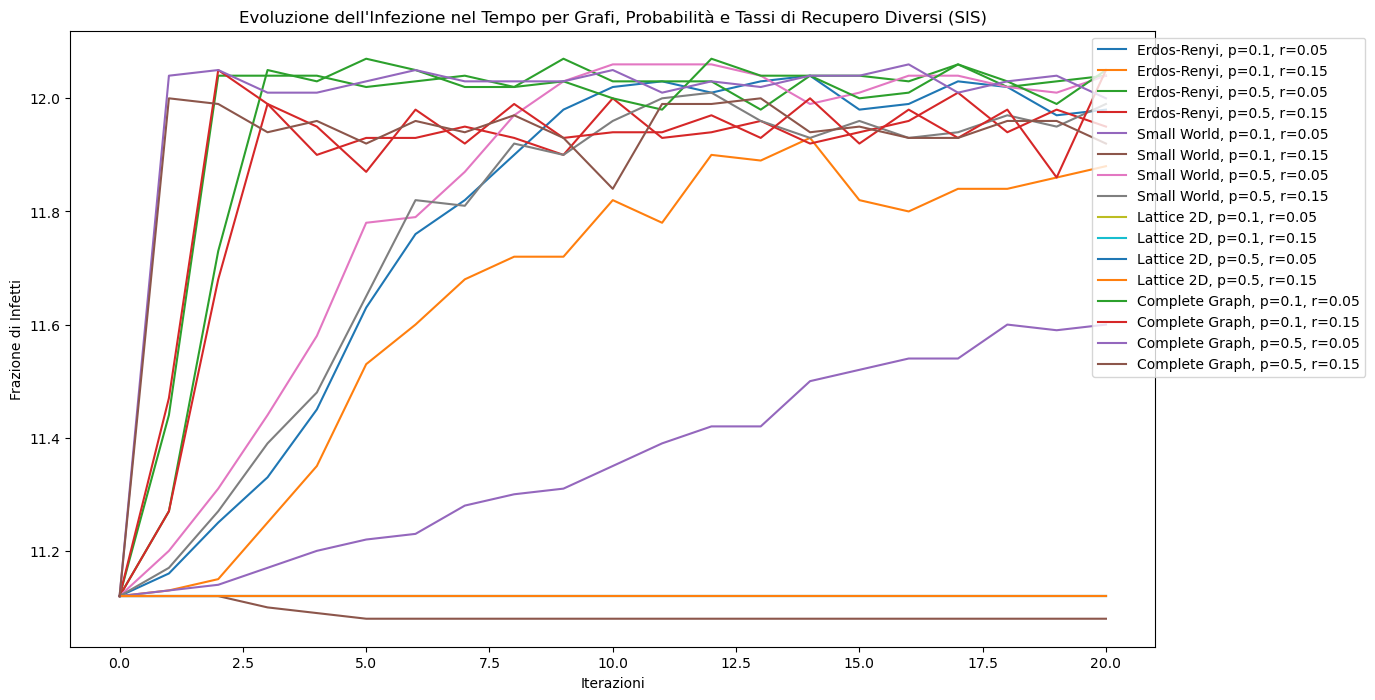

In [149]:
def run_simulation_on_different_graphs_SIS(graphs, probabilities, recovery_rates, initial_infected_nodes):
    plt.figure(figsize=(14, 8))
    
    for G, label in graphs:
        for p in probabilities:
            for recovery_rate in recovery_rates:
                infection_over_time = SIS_infection_with_semantics(G, p, recovery_rate, initial_infected_nodes)
                plt.plot(infection_over_time, label=f'{label}, p={p}, r={recovery_rate}')
    
    plt.xlabel('Iterazioni')
    plt.ylabel('Frazione di Infetti')
    plt.title('Evoluzione dell\'Infezione nel Tempo per Grafi, Probabilità e Tassi di Recupero Diversi (SIS)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()


probabilities = [0.1, 0.5]
recovery_rates = [0.05, 0.15]


graphs = [
    (nx.erdos_renyi_graph(100, 0.1), 'Erdos-Renyi'),
    (nx.watts_strogatz_graph(100, 4, 0.1), 'Small World'),
    (nx.grid_2d_graph(10, 10), 'Lattice 2D'),
    (nx.complete_graph(100), 'Complete Graph')
]

run_simulation_on_different_graphs_SIS(graphs, probabilities, recovery_rates, initial_infected_nodes)
